# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [1]:
print('Loading data...')
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/Users/bquinn/Desktop/traffic-signs-data (1)/train.p'
testing_file = '/Users/bquinn/Desktop/traffic-signs-data (1)/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print('Done loading data')

Loading data...
Done loading data


In [2]:
### Here is a basic data summary
n_train = len(X_train)
n_test = len(X_test)
image_shape = "{}x{}".format(len(X_train[0]), len(X_train[0][0]))
n_classes = max(y_train) + 1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = 32x32
Number of classes = 43


# Visualize Data

View a sample from the dataset.

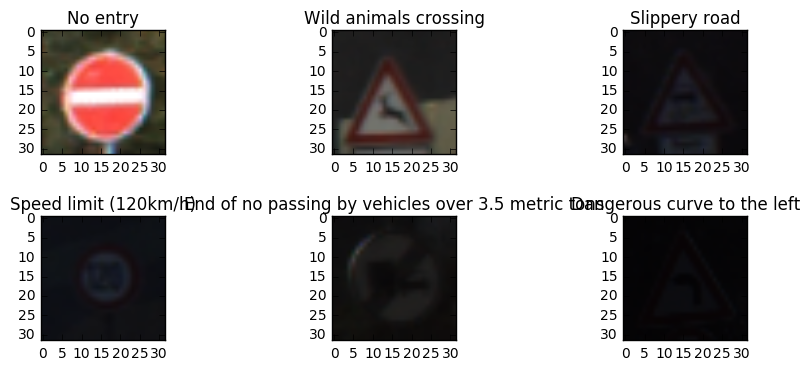

In [36]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
#from djilo
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sign_labels = np.genfromtxt('signnames.csv', skip_header=1, delimiter=',', usecols=(1,), unpack=True, dtype=str)

def plot_images(images, rows, columns, labels=[], labels_dict={}, random=True):
    figure = plt.figure()
    figure.subplots_adjust(right=1.5, hspace=0.5)
    n_images = len(images)
    max_plots = rows * columns
    end_range = n_images + 1 if n_images < max_plots else max_plots + 1
    for i in range(1,end_range):
        idx = np.random.choice(n_images, size=1, replace=False)[0] if random == True else i-1
        image = images[idx]
        subplot = figure.add_subplot(rows,columns,i)
        if len(labels) == n_images:
            id = labels[idx]
            label = labels_dict[id]
        else:
            label = ""
        subplot.set_title(label)
        plt.imshow(image)
    plt.show()

plot_images(X_train, 2, 3, y_train, sign_labels)

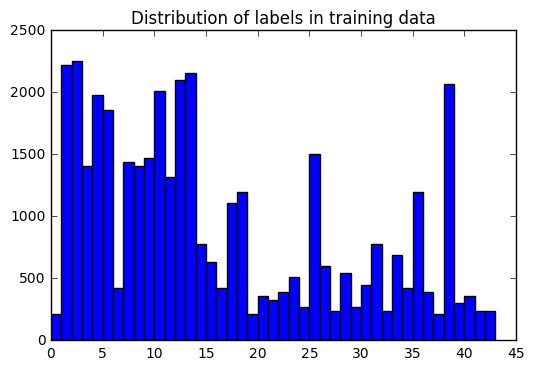

In [4]:
#showing the total class distribution
import collections

train_count = collections.Counter(train['labels'])
labels, values = zip(*train_count.items())
indexes = np.arange(len(labels))
width = 1
plt.title('Distribution of labels in training data')
plt.bar(indexes, values, width)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

# Preprocess Data





In [5]:
### Preprocess the data here.
#from djilo
import cv2
from sklearn.model_selection import train_test_split
# Using 20% of training set for validation 
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Convert to Grayscale 
def grayscale(image):
    converted = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return np.expand_dims(converted, axis=4)

# Scale the image pixel values to within range of [-0.5,0.5]
def normalize(image_data,max=255,deviation=0.5):
    return image_data/max - deviation

def pre_process_images(images):
  # Convert from rgb to grayscale 
  pre_processed = [grayscale(image) for image in images]
 
  # Scale the image
  pre_processed = [normalize(image) for image in pre_processed]

  # Return processed images list as a numpy array
  return np.asarray(pre_processed)

print("Data Successfully Preprocessed")

Data Successfully Preprocessed


In [6]:
# Pre-process training and test image data
X_train_normalized = pre_process_images(X_train)
X_test_normalized = pre_process_images(X_test)

print("Pre processing done on training and testing data")

Pre processing done on training and testing data


In [7]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

# Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

In [8]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 70

# Implement LeNet-5 Architecture

In [9]:
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    #layer 1
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

  
    conv1 = tf.nn.relu(conv1)

    # Pooling
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

   #Layer 2
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    #Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten
    fc0   = flatten(conv2)
    
    # Layer 3
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 512), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(512))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)

    #  Layer 5
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(512, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    
    return logits



# Features and Labels


`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

# Training Pipeline
Create a training pipeline that uses the model to classify the German traffic sign data.



In [11]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.



In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Train the Model
Run the training data through the training pipeline to train the model.Before each epoch, shuffle the training set. After each epoch, measure the loss and accuracy of the validation set. Save the model after training.



In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
        
        print()
        
    try:
        saver
    except NameError:
        saver = tf.train.Saver()
    save_path = saver.save(sess, 'lenet')
    print("Model saved")
    print("Final Validation Accuracy = {:.3f}".format(validation_accuracy)) 

Training...

EPOCH 1 ...
Validation Accuracy = 0.116

EPOCH 2 ...
Validation Accuracy = 0.207

EPOCH 3 ...
Validation Accuracy = 0.359

EPOCH 4 ...
Validation Accuracy = 0.527

EPOCH 5 ...
Validation Accuracy = 0.682

EPOCH 6 ...
Validation Accuracy = 0.772

EPOCH 7 ...
Validation Accuracy = 0.850

EPOCH 8 ...
Validation Accuracy = 0.862

EPOCH 9 ...
Validation Accuracy = 0.870

EPOCH 10 ...
Validation Accuracy = 0.893

EPOCH 11 ...
Validation Accuracy = 0.896

EPOCH 12 ...
Validation Accuracy = 0.903

EPOCH 13 ...
Validation Accuracy = 0.924

EPOCH 14 ...
Validation Accuracy = 0.901

EPOCH 15 ...
Validation Accuracy = 0.923

EPOCH 16 ...
Validation Accuracy = 0.912

EPOCH 17 ...
Validation Accuracy = 0.939

EPOCH 18 ...
Validation Accuracy = 0.940

EPOCH 19 ...
Validation Accuracy = 0.920

EPOCH 20 ...
Validation Accuracy = 0.953

EPOCH 21 ...
Validation Accuracy = 0.934

EPOCH 22 ...
Validation Accuracy = 0.939

EPOCH 23 ...
Validation Accuracy = 0.947

EPOCH 24 ...
Validation Accura

In [14]:
# Test on test set
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.893


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

After converting the image to grayscale, I gathered from reading Slack and forums to normalize the image data by scaling the pixel intensity (+/- 0.5). This enables to reduce the image pixel intensities of the dataset....both methods help preprocess the images in a way that benefits the accuracy of both training and testing sets.



### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I took 20% of the training data as validation data,  which seemed enough to avoid overfitting. However my training accuracy would be a max of about .95/.96. Next steps would be for me to do some data augmentation which would make up for some of the under-represented classes (which could be why my new image accuracy is so low. (?)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

LetNet5-Architecture taken from the last class (slightly modified each layers filter shape)

Input: 32x32x3 images

Layer 1: Convolutional. Filter Shape (5x5x32), Stride (1x1), VALID padding. Activation: Relu, 2x2 Max Pool

Layer 2: Convolutional. Filter Shape(5x5x64), Stride (1x1), VALID padding. Activation: Relu, 2x2 Max Pool

Flatten

Layer 3: Convolutional. Filter Shape(1600x1024), Activation: Relu 

Layer 4: Convolutional. Filter Shape(1024x512), Activation: Relu

Layer 5: Convolutional. Filter Shape(512x43)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I used the Adam Optimizer,
Epochs = 50
Batch Size =70
mu = 0
sigma = 0.1



### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I went ahead with the LeNet-5 architecture for this problem as it already tested over .90 accuracy for the training data. It’s also supposed to be a very good CNN which is ideal in classifying image data sets. For me it was mostly trial and error with tweaking the different parameters like the epoch size, learning rate, and batch size. I then tried to change the LeNet architecture by adjusting the filter shapes in each layer and that helped a lot. I increased the filter shapes in each consecutive layer and increased the epoch size which boosted my accuracy by a lot. (I jumped from .95 to high .99)

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

/Users/bquinn/anaconda/envs/CarND-LeNet-Lab/lib/python3.5/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


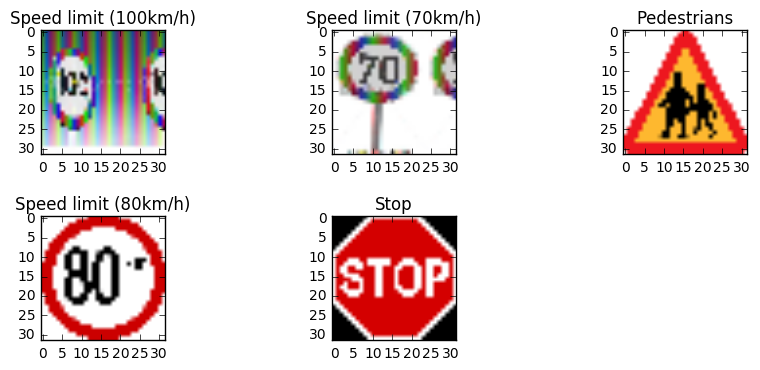

5
(32, 32, 3)


In [42]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg
import os
import cv2

test_dir_name = "/Users/bquinn/Desktop/testimages"
filenames = ["img1.png", "img2.png", "img3.png", "img4.png", "img5.png"]

test_images = [mpimg.imread(test_dir_name + "/" + file) for file in filenames]

test_images = [cv2.cvtColor(img, cv2.COLOR_RGBA2RGB) if img.shape[-1] else img for img in test_images]

test_images = np.array([cv2.resize(img, (32,32)) for img in test_images])

new_labels = np.array([7, 4, 27, 5, 14], np.float)

plot_images(test_images,rows=2,columns=3,labels=new_labels,labels_dict=sign_labels, random=False)

print(len(test_images))
print(test_images[0].shape)

In [43]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    #run through the same pre processing but on the new images
    pre_process_images(test_images)
    
    new_image_accuracy = evaluate(test_images, new_labels)
    print("Accuracy on new images = {:.3f}".format(new_image_accuracy))

Accuracy on new images = 0.000


probabilities:
[[ 0.13122687  0.10361028  0.07885009  0.06772894  0.06116899]
 [ 0.11271049  0.10001168  0.07414831  0.06483264  0.06325978]
 [ 0.17290555  0.12242382  0.07457443  0.06445792  0.04715682]
 [ 0.15156353  0.12229447  0.10579589  0.09649929  0.05976894]
 [ 0.14146152  0.14135848  0.07109655  0.07083238  0.05658609]]
class ids:
[[ 5  3  8 25 11]
 [ 3  5 32  9 25]
 [ 3  5  6  8  9]
 [25  3 11  5 32]
 [ 3  5  9  8 11]]


/Users/bquinn/anaconda/envs/CarND-LeNet-Lab/lib/python3.5/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


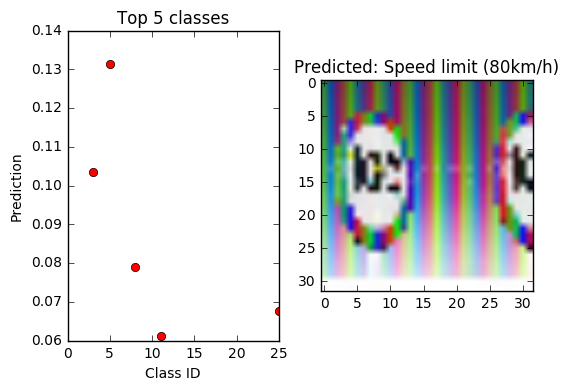

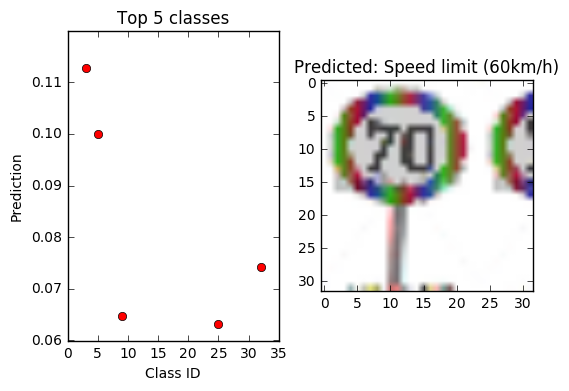

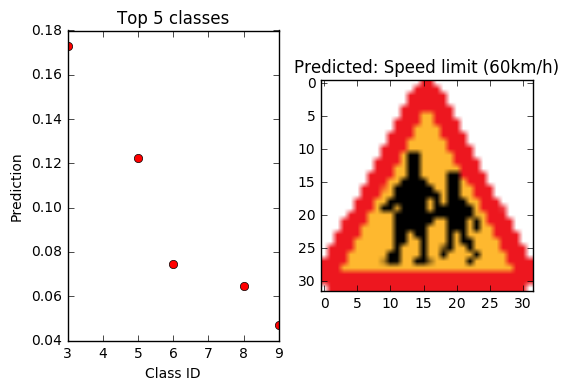

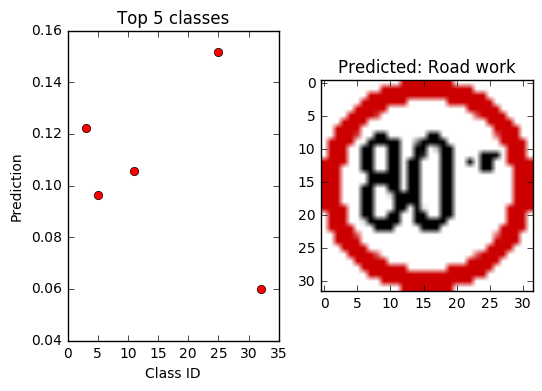

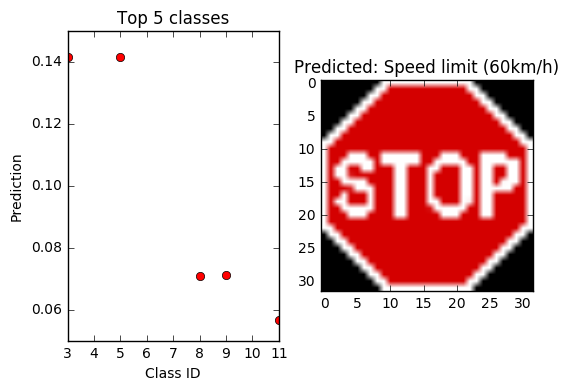

In [44]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
#from djilo
def class_prediction(probabilities, classes, image):
    figure = plt.figure()

    subplot = figure.add_subplot(1,2,1)
    subplot.set_title('Top 5 classes')
    plt.plot(classes, probabilities, 'ro')  
    plt.ylabel('Prediction')
    plt.xlabel('Class ID')

    top = probabilities.argmax()
    class_id = classes[top]
    predicted = sign_labels[float(class_id)]
  
    subplot = figure.add_subplot(1,2,2)
    title = "Predicted: %s" % predicted
    subplot.set_title(title)
    plt.imshow(image)
    plt.show()
    
    
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
            
    new_softmax_predictions = tf.nn.softmax(logits)
    topFive = tf.nn.top_k(new_softmax_predictions, k=5, sorted=True, name=None)
    
    print("probabilities:")
    probabilities = topFive.values.eval({x: test_images}, session=sess)
    print(probabilities)
    
    print("class ids:")
    classes = topFive.indices.eval({x: test_images}, session=sess)
    print(classes)
    
    for p, c, i in zip(probabilities, classes, test_images):
        class_prediction(p, c, i)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I googled most of these images which are fairly clear and a bit different from the training set. However to balance it out I also took some street view photos of similar signs (Even german ones). The Speed Limit (80km/h) might be difficult for my model to classify as it includes the "KM" which is different from the "80" sign in the training set (I was interested in seeing if my model was able to correctly predict this). I tried both but still got 0% accuracy on them.


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

No not all all. My accuracy is 0% and I'm a bit stuck as to why. My training accuracy is .95 and my test accuracy is high .87. Not sure why its completely 0.

Number 8 - My model is not certain of any of these classes as its accuracy is so low that it's predictions are wrong. 

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.